## Experimentally derived properties of simple queueing systems using discrete event simulation
Authors: Frenk Klein Schiphorst and Nathanyel Schut<br>
Student numbers: 11866497 and 12907995<br>
Date: 05-12-2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from des import *
import pandas as pd
import pyarrow.feather as feather

%load_ext pycodestyle_magic

### Convergence of average waiting times for increasing customers

As a first experiment, we keep all variables fixed except the total number of customers in the system to find out when the average waiting time converges to the expected value for a single server queue. Our variables are:
- $\lambda = \frac{1}{10}$
- $\mu = \frac{1}{9.5}$
- $\rho = 0.95$
- $N_{\text{servers}} = 1$
- $N_{\text{simulations}} = 200$

The number of customers is varied from 500 to 10000 customers in steps of 500 customers.

In [4]:
# Note: This cell took about 12 minutes and 30 seconds to run on
# a laptop with an 8th gen Intel Core i7 processor.

avg_wait_times = []
intervals = []
customers_l = range(500, 10500, 500)

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for customers in customers_l:
    wait_times_array = get_mean_wait_times(n_servers, customers, 200, 
                                           1 / labda, 1 / mu)
    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times.append(np.mean(wait_times_array))
    intervals.append(a)

    clear_output(wait=True)
    print(f'Simulation with {customers} customers completed!')

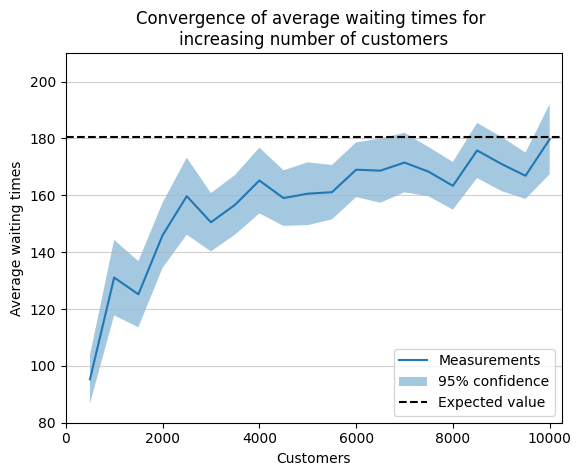

In [79]:
customers_l = range(500, 10500, 500)

plt.plot(customers_l, avg_wait_times, label='Measurements')

plt.fill_between(customers_l, np.array(avg_wait_times) - np.array(intervals), 
                 np.array(avg_wait_times) + np.array(intervals), alpha=.4,
                 label = '95% confidence')

plt.hlines([single_server_estimate], [0], [10250], 
           ['black'], ['dashed'], label='Expected value')

plt.xlim(0, 10250)
plt.ylim(80, 210)

plt.xlabel('Customers')
plt.ylabel('Average waiting times')
plt.title('Convergence of average waiting times\
           for \nincreasing number of customers')

plt.legend(loc='lower right')
plt.grid(axis='y', alpha=.6)

plt.show()

Here we can see that around 10000 customers need to be simulated in order for the average waiting times to converge to the expected value.

Now we perform the same experiment, but with less customers and with the waiting times of the first 1000 customers removed. By removing the first 1000 customers we should observe faster convergence to the expected value. In this step we will be finetuning our estimate of how many customers need to be simulated and so we will also be increasing the amount of simulations for our estimate of the average waiting times.

In [2]:
# Note: This cell took about 10 minutes and 40 seconds to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_adj = []
intervals_adj = []
customers_l = range(2000, 7500, 500)

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for customers in customers_l:
    wait_times_array = get_mean_wait_times(n_servers, customers, 500, 
                                           1 / labda, 1 / mu)

    # Throw away the first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]

    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_adj.append(np.mean(wait_times_array))
    intervals_adj.append(a)

    clear_output(wait=True)
    print(f'Simulation with {customers} customers completed!')

Simulation with 7000 customers completed!


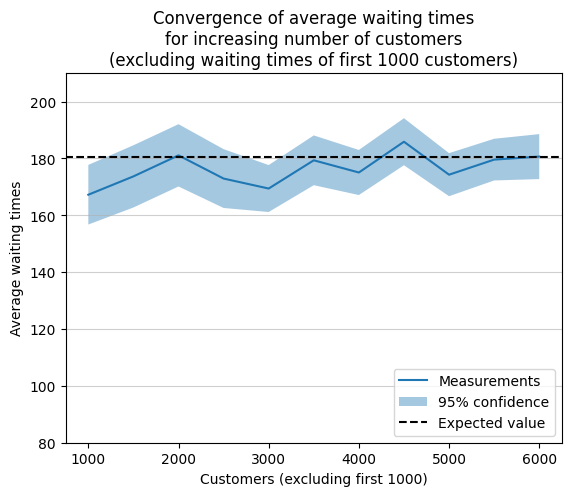

In [8]:
customers_l = range(2000, 7500, 500)
customers_l = np.array(customers_l) - 1000

plt.plot(customers_l, avg_wait_times_adj, label='Measurements')

y1 = np.array(avg_wait_times_adj) - np.array(intervals_adj)
y2 = np.array(avg_wait_times_adj) + np.array(intervals_adj)
plt.fill_between(customers_l, y1, y2, alpha=.4, label = '95% confidence')

plt.hlines([single_server_estimate], [0], [7500], ['black'], 
           ['dashed'], label='Expected value')

plt.xlim(min(customers_l) - 250, max(customers_l) + 250)
plt.ylim(80, 210)
plt.xlabel('Customers (excluding first 1000)')
plt.ylabel('Average waiting times')
plt.title('Convergence of average waiting times\nfor increasing number\
           of customers\n(excluding waiting times of first 1000 customers)')

plt.legend(loc='lower right')
plt.grid(axis='y', alpha=.6)

plt.show()

We now see that the average waiting times converge much faster. It seems like convergence has been reached at 6000 (perhaps a little earlier, but it is hard to tell) customers, excluding the first 1000, and so we would need to simulate 7000 customers in total.

### Convergence of average waiting times for increasing number of simulations

Now we want to find out how many simulations should be performed to get a good estimate for the average waiting times. We can then compare the number of simulations it took to get a decent estimate for different values of $\rho$.

In [2]:
# Note: This cell took about 15 minutes and 50 seconds to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_2 = []
intervals_2 = []
simulations_l = list(range(100, 1100, 100))

simulations_l = [50] + simulations_l

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for simulations in simulations_l:
    wait_times_array = get_mean_wait_times(n_servers, 7000, simulations, 
                                           1 / labda, 1 / mu)

    # Throw away first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]
    
    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_2.append(np.mean(wait_times_array))
    intervals_2.append(a)

    clear_output(wait=True)
    print(f'Test with {simulations} simulations completed!')

Test with 1000 simulations completed!


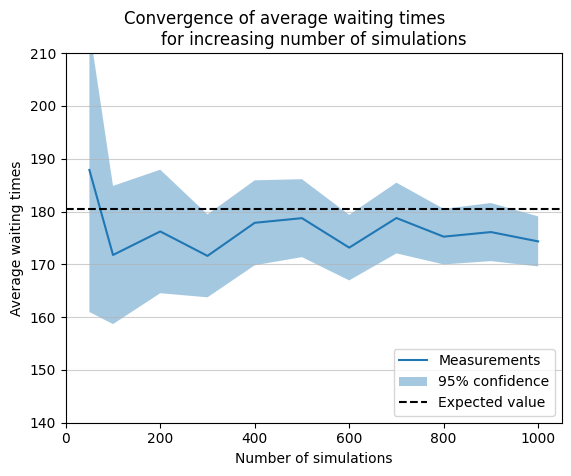

In [3]:
plt.plot(simulations_l, avg_wait_times_2, label='Measurements')

y1 = np.array(avg_wait_times_2) - np.array(intervals_2)
y2 = np.array(avg_wait_times_2) + np.array(intervals_2)
plt.fill_between(simulations_l, y1, y2, alpha=.4, label = '95% confidence')
                 
plt.hlines([single_server_estimate], [0], [1050], ['black'],
           ['dashed'], label='Expected value')

plt.xlim(0, 1050)
plt.ylim(140, 210)
plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Convergence of average waiting times\
           \nfor increasing number of simulations')

plt.legend(loc='lower right')
plt.grid(axis='y', alpha=.6)

plt.show()

This last experiment was repeated for different values of $\rho$ (0.8, 0.9, 0.95) and for different number of servers. The code for these experiments is left out as it is very similar to the blocks of code above, just with different values for mu and n_servers. The results of these simulations are saved in a feather file which can be imported with the code below. For each experiment 7000 customers were simulated with the first 1000 removed.

In [4]:
# Make sure to include 'simulations.feather' in the same directory as 
# this notebook
df_simulations_saved = feather.read_feather('simulations.feather')
df_simulations_saved

,simulations 1 (rho = 0.95),avg wait times 1 (rho = 0.95),intervals 1 (rho = 0.95),simulations 1 (rho = 0.8),avg wait times 1 (rho = 0.8),intervals 1 (rho = 0.8),simulations 1 (rho = 0.9),avg wait times 1 (rho = 0.9),intervals 1 (rho = 0.9),simulations 2 (rho = 0.95),avg wait times 2 (rho = 0.95),intervals 2 (rho = 0.95),simulations 4 (rho = 0.95),avg wait times 4 (rho = 0.95),intervals 4 (rho = 0.95),"simulations 1 (rho = 0.95, SJF)","avg wait times 1 (rho = 0.95, SJF)","intervals 1 (rho = 0.95, SJF)"
0,50,185.200774,25.090254,50,32.285956,1.429054,50,75.716997,4.121172,50,91.426196,11.158150,50,40.689082,5.680148,50,48.295522,3.592314
1,100,175.214033,14.441820,100,32.249228,0.867809,100,82.365702,4.002768,100,86.216141,8.235548,100,41.283801,4.399098,100,49.774769,2.753748
2,200,183.858822,10.649545,200,31.766724,0.634633,200,81.723075,3.523137,200,84.486489,4.766293,200,40.573591,2.342726,200,47.984260,1.793003
3,300,179.184798,9.360072,300,32.174518,0.530327,300,83.326778,2.675837,300,89.075230,5.202404,300,40.775931,2.301028,300,49.857977,2.029731
4,400,176.880529,8.487081,400,31.870808,0.493193,400,78.646436,1.820550,400,85.770951,4.492170,400,42.101965,2.226488,400,49.520583,1.639457
5,500,174.273775,7.193982,500,31.756073,0.394993,500,82.390918,1.881610,500,88.133949,3.897271,500,41.608352,1.829284,500,51.537197,1.437123
6,600,181.115340,6.168205,600,31.690061,0.335281,600,81.103665,1.649017,600,86.879635,3.571722,600,42.847526,1.657603,600,49.569417,1.191298
7,700,177.253090,6.767899,700,32.065291,0.359577,700,80.480762,1.514044,700,88.061429,2.916622,700,41.811120,1.618491,700,49.183137,1.324853
8,800,177.064516,5.300597,800,32.222003,0.311652,800,80.486370,1.457763,800,88.281469,2.877750,800,42.188483,1.401099,800,51.706439,1.203955
9,900,173.377420,4.859675,900,31.701202,0.291533,900,81.161567,1.439590,900,85.115498,2.727162,900,42.148077,1.369839,900,50.384609,1.129882


We can now compare the average waiting times for different values of $\rho$:

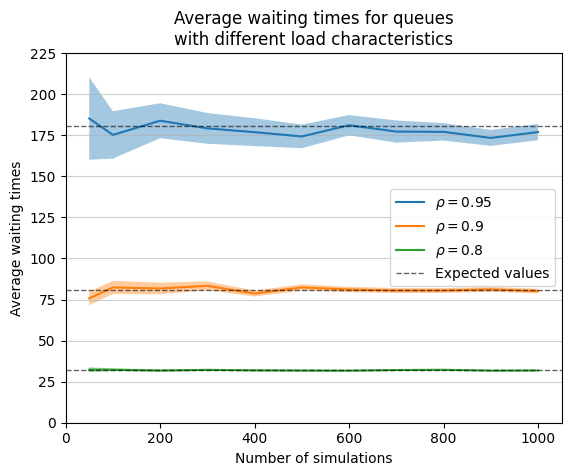

In [3]:
columns = df_simulations_saved.columns
mu_l = [1 / 9.5, 1 / 9, 1 / 8]
labda = 1 / 10
rho_l = [labda / mu for mu in mu_l]
labels = [r'$\rho = $' + str(round(rho, 3)) for rho in rho_l]

indices = [0, 6, 3]

single_server_estimates = [(rho / (1 - rho)) * (1 / mu) for rho, mu in 
                           zip(rho_l, mu_l)]

for i, column_i in enumerate(indices):
    x = df_simulations_saved[columns[column_i]]
    y = df_simulations_saved[columns[column_i + 1]]
    y_int = df_simulations_saved[columns[column_i + 2]]

    plt.plot(x, y, label=labels[i])

    y1 = y - y_int
    y2 = y + y_int
    plt.fill_between(x, y1, y2, alpha=.4)

plt.hlines(single_server_estimates, 0, 1100, 'black', 
                   'dashed', alpha=.6, lw=1, label='Expected values')

plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Average waiting times for queues\nwith '\
          'different load characteristics')

plt.ylim(0, 225)
plt.xlim(0, 1050)
plt.legend()
plt.grid(axis='y', alpha=.6)

plt.show()

And we can compare the average waiting times for different amounts of servers:

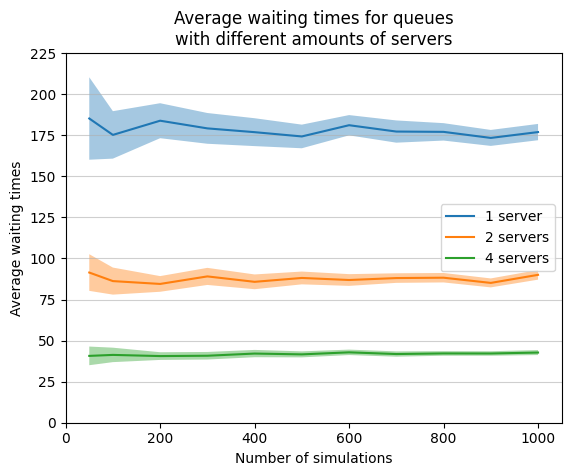

In [60]:
columns = df_simulations_saved.columns
n_server_l = [1, 2, 4]
labels = ['1 server', '2 servers', '4 servers']

indices = [0, 9, 12]

for i, column_i in enumerate(indices):
    x = df_simulations_saved[columns[column_i]]
    y = df_simulations_saved[columns[column_i + 1]]
    y_int = df_simulations_saved[columns[column_i + 2]]

    plt.plot(x, y, label=labels[i])

    y1 = y - y_int
    y2 = y + y_int
    plt.fill_between(x, y1, y2, alpha=.4)

plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Average waiting times for queues\nwith '\
          'different amounts of servers')

plt.ylim(0, 225)
plt.xlim(0, 1050)
plt.legend(loc='center right')
plt.grid(axis='y', alpha=.6)

plt.show()

### Shortest job scheduling

We will now consider an alternative queueing discipline in the form of shortest job scheduling.

In [2]:
# Note: This cell took about 15 minutes and 50 seconds to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_priority = []
intervals_priority = []
simulations_priority = list(range(100, 1100, 100))

simulations_priority = [50] + simulations_priority

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for simulations in simulations_priority:
    wait_times_array = get_mean_wait_times(n_servers, 7000, simulations, 
                                           1 / labda, 1 / mu, use_priority=True)

    # Throw away first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]
    
    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_priority.append(np.mean(wait_times_array))
    intervals_priority.append(a)

    clear_output(wait=True)
    print(f'Test with {simulations} simulations completed!')

Test with 1000 simulations completed!


The results for this experiment have been saved in the last 3 columns of our dataframe.

In [7]:
df_simulations_saved

,simulations 1 (rho = 0.95),avg wait times 1 (rho = 0.95),intervals 1 (rho = 0.95),simulations 1 (rho = 0.8),avg wait times 1 (rho = 0.8),intervals 1 (rho = 0.8),simulations 1 (rho = 0.9),avg wait times 1 (rho = 0.9),intervals 1 (rho = 0.9),simulations 2 (rho = 0.95),avg wait times 2 (rho = 0.95),intervals 2 (rho = 0.95),simulations 4 (rho = 0.95),avg wait times 4 (rho = 0.95),intervals 4 (rho = 0.95),"simulations 1 (rho = 0.95, SJF)","avg wait times 1 (rho = 0.95, SJF)","intervals 1 (rho = 0.95, SJF)"
0,50,185.200774,25.090254,50,32.285956,1.429054,50,75.716997,4.121172,50,91.426196,11.158150,50,40.689082,5.680148,50,48.295522,3.592314
1,100,175.214033,14.441820,100,32.249228,0.867809,100,82.365702,4.002768,100,86.216141,8.235548,100,41.283801,4.399098,100,49.774769,2.753748
2,200,183.858822,10.649545,200,31.766724,0.634633,200,81.723075,3.523137,200,84.486489,4.766293,200,40.573591,2.342726,200,47.984260,1.793003
3,300,179.184798,9.360072,300,32.174518,0.530327,300,83.326778,2.675837,300,89.075230,5.202404,300,40.775931,2.301028,300,49.857977,2.029731
4,400,176.880529,8.487081,400,31.870808,0.493193,400,78.646436,1.820550,400,85.770951,4.492170,400,42.101965,2.226488,400,49.520583,1.639457
5,500,174.273775,7.193982,500,31.756073,0.394993,500,82.390918,1.881610,500,88.133949,3.897271,500,41.608352,1.829284,500,51.537197,1.437123
6,600,181.115340,6.168205,600,31.690061,0.335281,600,81.103665,1.649017,600,86.879635,3.571722,600,42.847526,1.657603,600,49.569417,1.191298
7,700,177.253090,6.767899,700,32.065291,0.359577,700,80.480762,1.514044,700,88.061429,2.916622,700,41.811120,1.618491,700,49.183137,1.324853
8,800,177.064516,5.300597,800,32.222003,0.311652,800,80.486370,1.457763,800,88.281469,2.877750,800,42.188483,1.401099,800,51.706439,1.203955
9,900,173.377420,4.859675,900,31.701202,0.291533,900,81.161567,1.439590,900,85.115498,2.727162,900,42.148077,1.369839,900,50.384609,1.129882


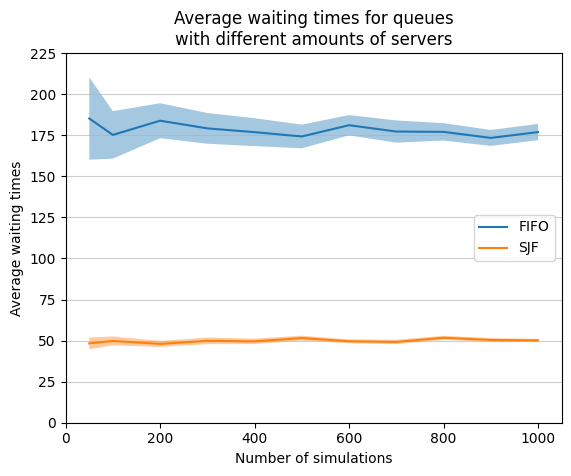

In [8]:
columns = df_simulations_saved.columns
labels = ['FIFO', 'SJF']

indices = [0, 15]

for i, column_i in enumerate(indices):
    x = df_simulations_saved[columns[column_i]]
    y = df_simulations_saved[columns[column_i + 1]]
    y_int = df_simulations_saved[columns[column_i + 2]]

    plt.plot(x, y, label=labels[i])

    y1 = y - y_int
    y2 = y + y_int
    plt.fill_between(x, y1, y2, alpha=.4)

plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Average waiting times for queues\nwith '\
          'different amounts of servers')

plt.ylim(0, 225)
plt.xlim(0, 1050)
plt.legend(loc='center right')
plt.grid(axis='y', alpha=.6)

plt.show()

### Different service time distributions

Lastly, we will experiment with two different service time distributions in the form of a deterministic (D) service time distribution as well as a hyperexponential (H) service time distribution.

Deterministic service times:

In [2]:
# Note: This cell took about 16 minutes to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_det = []
intervals_det = []
simulations_det = list(range(100, 1100, 100))

simulations_det = [50] + simulations_det

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for simulations in simulations_det:
    wait_times_array = get_mean_wait_times(n_servers, 7000, simulations, 
                                           1 / labda, 1 / mu, use_priority=False,
                                           service_time_distribution='D')

    # Throw away first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]

    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_det.append(np.mean(wait_times_array))
    intervals_det.append(a)

    clear_output(wait=True)
    print(f'Test with {simulations} simulations completed!')

Test with 1000 simulations completed!


Hyperexponential service times:

In [8]:
# Note: This cell took about 18 minutes and 8 seconds to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_hyp = []
intervals_hyp = []
simulations_hyp = list(range(100, 1100, 100))

simulations_hyp = [50] + simulations_hyp

n_servers = 1
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

single_server_estimate = (rho / (1 - rho)) * (1 / mu)

for simulations in simulations_hyp:
    wait_times_array = get_mean_wait_times(n_servers, 7000, simulations, 
                                           1 / labda, 1 / mu, use_priority=False,
                                           service_time_distribution='H')

    # Throw away first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]

    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_hyp.append(np.mean(wait_times_array))
    intervals_hyp.append(a)

    clear_output(wait=True)
    print(f'Test with {simulations} simulations completed!')

Test with 1000 simulations completed!


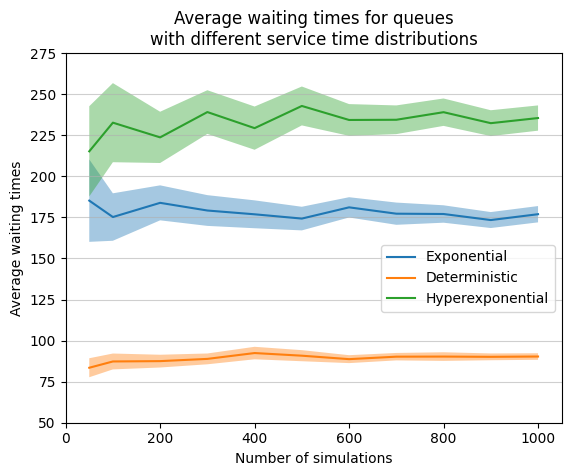

In [21]:
columns = df_simulations_saved.columns
labels = ['Exponential', 'Deterministic', 'Hyperexponential']

indices = [0, 18, 21]

for i, column_i in enumerate(indices):
    x = df_simulations_saved[columns[column_i]]
    y = df_simulations_saved[columns[column_i + 1]]
    y_int = df_simulations_saved[columns[column_i + 2]]

    plt.plot(x, y, label=labels[i])

    y1 = y - y_int
    y2 = y + y_int
    plt.fill_between(x, y1, y2, alpha=.4)

plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Average waiting times for queues\nwith '\
          'different service time distributions')

plt.ylim(50, 275)
plt.xlim(0, 1050)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', alpha=.6)

plt.show()

In [22]:
# Note: This cell took about 16 minutes to run on
# a desktop with a 4th gen Intel Core i5 processor.

avg_wait_times_det4 = []
intervals_det4 = []
simulations_det4 = list(range(100, 1100, 100))

simulations_det4 = [50] + simulations_det4

n_servers = 4
labda = n_servers / 10
mu = 1 / 9.5
rho = labda / (n_servers*mu)

for simulations in simulations_det4:
    wait_times_array = get_mean_wait_times(n_servers, 7000, simulations, 
                                           1 / labda, 1 / mu, use_priority=False,
                                           service_time_distribution='D')

    # Throw away first 1000 customers
    wait_times_array = wait_times_array[:, 1000:]

    a = get_confidence_interval(0.95, wait_times_array)

    avg_wait_times_det4.append(np.mean(wait_times_array))
    intervals_det4.append(a)

    clear_output(wait=True)
    print(f'Test with {simulations} simulations completed!')

Test with 1000 simulations completed!


In [1]:
columns = df_simulations_saved.columns
labels = ['Exponential', 'Deterministic']

indices = [12, 24]

for i, column_i in enumerate(indices):
    x = df_simulations_saved[columns[column_i]]
    y = df_simulations_saved[columns[column_i + 1]]
    y_int = df_simulations_saved[columns[column_i + 2]]

    plt.plot(x, y, label=labels[i])

    y1 = y - y_int
    y2 = y + y_int
    plt.fill_between(x, y1, y2, alpha=.4)

plt.xlabel('Number of simulations')
plt.ylabel('Average waiting times')
plt.title('Average waiting times for queues\nwith '\
          'different queuing disciplines')

plt.ylim(0, 50)
plt.xlim(0, 1050)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=.6)

plt.show()

NameError: name 'df_simulations_saved' is not defined